# INTRODUCTION:

The problem posed is prediction of continuous dependent variable i.e. interest rate from a suitable combination of independent variables, the general approach to the problem is trying to build a linear relational model as a basic benchmark model and later on building more generalized models to improve the accuracy of predictions by simultaneously aiming to reduce the error rate.


Loading the helper packages.

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Loading the data into pandas and getting a feel for it. As we can see the data needs a lot of cleaning before proceeding to analysis.

In [484]:
cmpltdf=pd.read_csv('C:/Users/Raj/Desktop/sf work assignment.6.8.2016 (1)/Data for Cleaning & Modeling.csv')

In [485]:
cmpltdf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734,80364,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,2/1/1994,0,NaN,NaN,10,0,28854,52.10%,42,f
1,10.71%,55742,114426,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,10/1/2000,0,NaN,NaN,7,0,33623,76.70%,7,f
2,16.99%,57167,137225,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,6/1/2000,0,41,NaN,10,0,19878,66.30%,17,f
3,13.11%,57245,138150,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,1/1/1985,0,64,NaN,5,0,2584,40.40%,31,f
4,13.57%,57416,139635,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,...,12/1/1996,1,58,NaN,14,0,3511,25.60%,40,f


we can see the dimensions of our data below, we have 400000 rows and 32 columns

In [486]:
cmpltdf.shape


(400000, 32)

Let us see how many columns have missing values

In [487]:
cmpltdf.isnull().sum()

X1      61010
X2          1
X3          1
X4          1
X5          1
X6          1
X7          1
X8      61270
X9      61270
X10     23982
X11         1
X12     61361
X13     61028
X14         1
X15         1
X16    276439
X17         1
X18        18
X19         1
X20         1
X21         1
X22         1
X23         1
X24         1
X25    218802
X26    348845
X27         1
X28         1
X29         1
X30       267
X31         1
X32         1
dtype: int64

# DATA CLEANING

There are a lot of missing values in each column, cleaning the columns before imputing missing values. We can see right away that columns X16, X25 and X26 have more than 50% of missing 
data we can remove those columns right away, but we will keep them for now and see if we can fill those missing values logically using the 
remaining data, if we cannot we will remove them later on.

In [488]:
#cleaning data.
cmpltdf.dtypes
cmpltdf.X1=cmpltdf.X1.str.strip('%')
cmpltdf[['X4','X5','X6']]=cmpltdf[['X4','X5','X6']].apply(lambda x:x.str.strip('$').
                                                          replace(',','',regex=True))
cmpltdf.X7=cmpltdf.X7.str.rstrip('months')
#assigning <1 as 0.5 and 10+ years as 10,converting n/a to 0 for column X11
cmpltdf.X11=cmpltdf.X11.str.rstrip('+ years').replace('< 1','0.5',regex=True)
cmpltdf.X11=cmpltdf.X11.str.replace('n/','0')
cmpltdf.X14=cmpltdf.X14.str.rstrip('- income source')
#converting the date column into datetime.
cmpltdf.X15=pd.to_datetime(cmpltdf.X15,format='%m/%d/%Y')
cmpltdf['X23']=pd.to_datetime(cmpltdf.X23,format='%m/%d/%Y')
cmpltdf.X30=cmpltdf.X30.str.strip('%')
cmpltdf.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89,54734,80364,25000,25000,19080,36,B,B4,NaN,...,1994-02-01,0,NaN,NaN,10,0,28854,52.10,42,f
1,10.71,55742,114426,7000,7000,673,36,B,B5,CNN,...,2000-10-01,0,NaN,NaN,7,0,33623,76.70,7,f
2,16.99,57167,137225,25000,25000,24725,36,D,D3,Web Programmer,...,2000-06-01,0,41,NaN,10,0,19878,66.30,17,f
3,13.11,57245,138150,1200,1200,1200,36,C,C2,city of beaumont texas,...,1985-01-01,0,64,NaN,5,0,2584,40.40,31,f
4,13.57,57416,139635,10800,10800,10692,36,C,C3,State Farm Insurance,...,1996-12-01,1,58,NaN,14,0,3511,25.60,40,f


converting the dtypes of each column appropriately.

In [489]:
cmpltdf.dtypes

X1             object
X2            float64
X3            float64
X4             object
X5             object
X6             object
X7             object
X8             object
X9             object
X10            object
X11            object
X12            object
X13           float64
X14            object
X15    datetime64[ns]
X16            object
X17            object
X18            object
X19            object
X20            object
X21           float64
X22           float64
X23    datetime64[ns]
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
X30            object
X31           float64
X32            object
dtype: object

In [393]:
#typecasting int numeric.
cmpltdf[['X1', 'X4','X5','X6','X13','X21','X22','X24','X25','X26','X27',
         'X28','X29','X30','X31']]=cmpltdf[['X1', 'X4','X5','X6','X13',
                                            'X21','X22','X24','X25','X26','X27','X28','X29','X30','X31']].apply(lambda x:pd.to_numeric(x))

cmpltdf[['X7','X8','X9','X11','X12','X14','X17','X20','X32']]=cmpltdf[[
        'X7','X8','X9','X11','X12','X14','X17','X20','X32']].apply(lambda x:x.astype('category'))

cmpltdf.dtypes


X1            float64
X2            float64
X3            float64
X4            float64
X5            float64
X6            float64
X7           category
X8           category
X9           category
X10            object
X11          category
X12          category
X13           float64
X14          category
X15    datetime64[ns]
X16            object
X17          category
X18            object
X19            object
X20          category
X21           float64
X22           float64
X23    datetime64[ns]
X24           float64
X25           float64
X26           float64
X27           float64
X28           float64
X29           float64
X30           float64
X31           float64
X32          category
dtype: object

We can safely remove the columns X16 and X18 from our analysis as these columns contain text data in the form of comments entered by 
the borrowers, we will keep the X17 column i.e. the loan category as it is not random text even though it is entered by borrower.
Similarly we will drop column X10 even though it look like an important column there are a lot of levels to it which cannot be categorized.


In [394]:
cmpltdf.drop(['X16','X18','X10'],inplace = True,axis=1)

# EXPLORATORY DATA ANALYSIS & VISULIZATION:


count    338990.000000
mean         13.946271
std           4.377951
min           5.420000
25%          10.990000
50%          13.680000
75%          16.780000
max          26.060000
Name: X1, dtype: float64

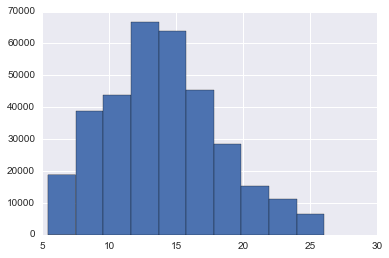

In [395]:

cmpltdf.X1.hist()
cmpltdf.X1.describe()
#sns.boxplot(cmpltdf.X1)
#cmpltdf.loc[(cmpltdf.X1>24),['X1','X22','X4', 'X30','X29','X31']]
#cmpltdf.loc[(cmpltdf.X1>24),['X1','X16','X17', 'X18','X29','X31']]
#cmpltdf.X17.value_counts()

First exploring the target variable, the target variable seems normally distributed. Next let us visualize the variable X8 which is 
a categorical variable and also let us see the impact it has on our target variable X1. violin plot is a good way to assess the effect of 
a categorical variable on other variable, the below violin plots show that the mean of the target variable is highly impacted by the grouping 
of levels in the target variables. The long tails in the violin plots hints outliers.

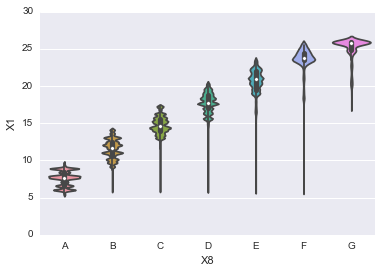

In [396]:
#sns.countplot(x=cmpltdf.X8, palette='Blues_d')
sns.violinplot(x="X8", y="X1", data=cmpltdf)

Now that we know that the categorical variable X8 is going to be important in our analysis let us visualize the variable X9 which is
Similar to the variable X8 provides granular level details then X8. Let us plot a facet grid plot to see the influence of variable X9 on the target variable at a much granular level.


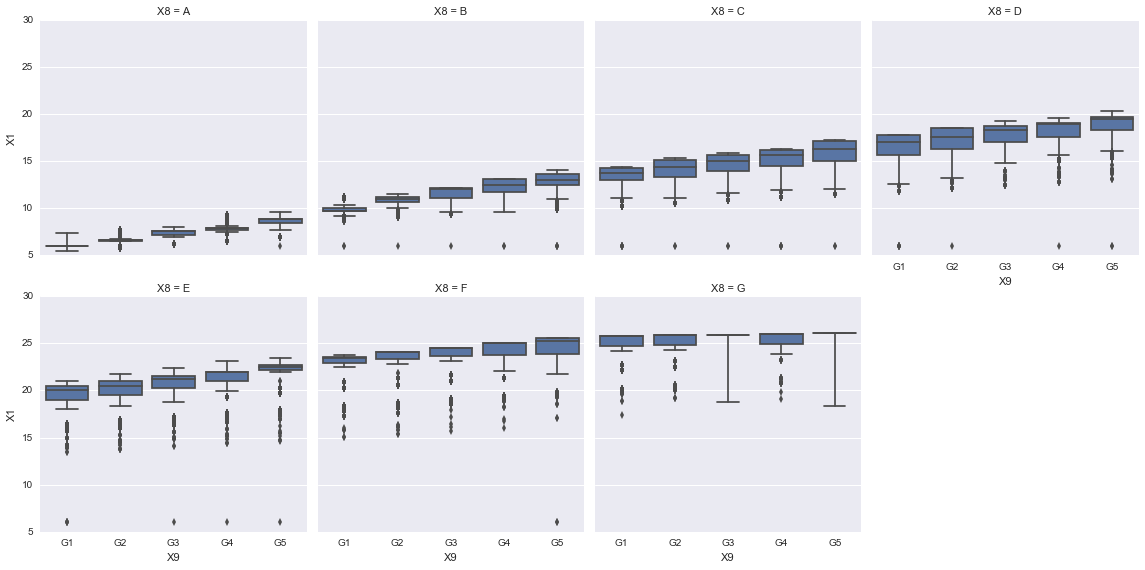

In [397]:
#Facet grid Plot
#g = sns.factorplot(x="X8", y="X1", hue="X9" ,data=cmpltdf, kind="violin",size=20.5)

df = cmpltdf.assign(X9=cmpltdf.X9.astype(object)).sort("X9")
grid=sns.FacetGrid(df,col='X8', col_wrap=4,size=4)
grid.map(sns.boxplot,'X9','X1')

The variable X9 is a potential data leak as it explains almost all the variance in the target variable, this leak can be exploited 
to impute the missing values in the columns X1 and X9. The missing values in X1 can be imputed by the grouped means of X1 by X9 and similarly
missing values in X1 can be imputed by grouping on X9. The code for imputing missing values in both the columns is below..

In [398]:
#mean values after imputaion
cmpltdf['X9'] = cmpltdf.groupby(['X1'])['X9'].transform(lambda x: x.fillna(method='ffill'))
cmpltdf['X1'].groupby(cmpltdf.X9).mean()

X9
A1     6.002905
A2     6.566850
A3     7.450486
A4     7.828795
A5     8.703269
B1     9.730468
B2    10.772742
B3    11.699056
B4    12.472588
B5    13.069878
C1    13.677812
C2    14.280730
C3    14.837854
C4    15.412472
C5    16.042135
D1    16.695921
D2    17.297698
D3    17.835426
D4    18.403431
D5    19.073152
E1    19.560820
E2    20.220477
E3    20.821978
E4    21.494988
E5    22.138226
F1    22.919932
F2    23.353235
F3    23.919594
F4    24.221877
F5    24.515928
G1    24.950680
G2    25.080610
G3    25.335682
G4    25.209003
G5    25.433292
Name: X1, dtype: float64

The Means did not change after imputation implies imputation was succesful.

similarly we will fill the missing values in X1 with the grouping of column X9.

9404

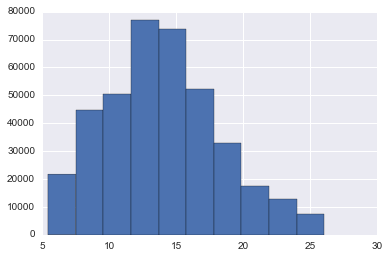

In [399]:
cmpltdf.X1=cmpltdf.groupby(['X9'])['X1'].transform(lambda x: x.fillna(method='ffill'))
cmpltdf.X1.hist()
cmpltdf.X1.isnull().sum()

In [400]:
#cmpltdf.isnull().sum()

The histogram above is same as the histogram before filling the missing values, this implies that missing values imputation was succesfull


We can safely drop the column X8 as we have a much more granular column in X9 which can be used.

In [401]:
cmpltdf.drop(['X8'],inplace = True,axis=1)

the column X12 has the most missing values. The missing values can be
imputed by mode but there can be a more logical way to impute it, let us consider the effect of variable X17 on X12 with a simple groupby
command, and we can see that there is influence of variable X17 on X12, let us anyway do a chi squared test to confirm that.

In [402]:
from scipy.stats import chi2_contingency
chirslts=chi2_contingency(pd.crosstab(cmpltdf.X12,cmpltdf.X17))
print float(chirslts[1])

0.0


The p-value of Chi Square test evaluates our hypothesis that the variable X17 has influence on X12 so we can now impute the missing values
in X12 with the means of X12 grouped by X17.

In [403]:
cmpltdf.X12=cmpltdf.groupby(['X17'])['X12'].transform(lambda x: x.fillna(method='ffill'))
cmpltdf.X12.isnull().sum()

1

Now let us fill the missing values in the column X13, the distribution looks skewed so it is better if we inpute the values with 
median of the column.

In [404]:
#cmpltdf.isnull().sum()
#len(cmpltdf.X13.value_counts())
#cmpltdf.X13.hist().set(xlim=(0, max(cmpltdf.X13)))
cmpltdf.X13.describe()

count     338972.000000
mean       73160.149695
std        55867.696483
min         3000.000000
25%        45000.000000
50%        63000.000000
75%        88200.000000
max      7500000.000000
Name: X13, dtype: float64

In [405]:
cmpltdf.X13=cmpltdf.X13.fillna(cmpltdf.X13.median())
#cmpltdf.isnull().sum()

Now let us look into the colum X30 which has only 200 missing vlaues, these missing values can be filled with the mean of the column


In [406]:
cmpltdf.X30.describe()

count    399733.000000
mean         56.279059
std          23.734198
min           0.000000
25%          39.500000
50%          57.800000
75%          74.900000
max         892.300000
Name: X30, dtype: float64

In [407]:
cmpltdf.X30=cmpltdf.X30.fillna(cmpltdf.X30.mean())

Dropping X25,X26 as more than half data is missing values

In [408]:
cmpltdf.drop(['X25','X26'], inplace =True , axis=1)

In [409]:
#moving into a newdf
clndf=cmpltdf.copy()


now that we are done with cleaning the data and imputing missing values we can now go ahead and remove the remaining missing values as there are no logical ways to impute the remaining missing values.

In [410]:
clndf.dropna(inplace=True)


In [411]:
#dropping X2 abd X3 as they are just ID's
clndf.drop(['X2','X3'], inplace =True , axis=1)

# FEATURE SELECTION:

Now we will go ahead with selecting important variables for our model.

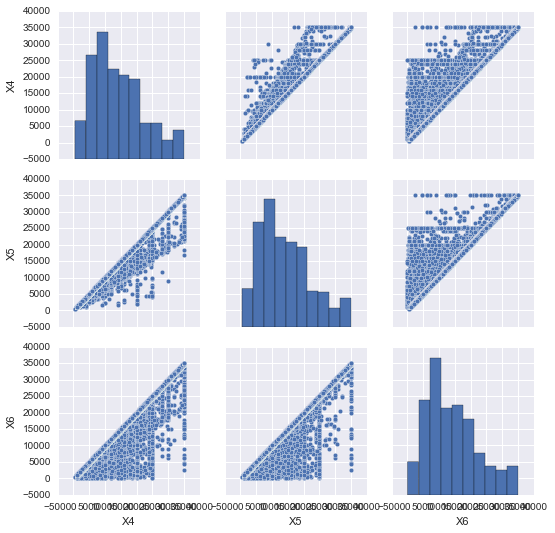

In [412]:
sns.pairplot(clndf[['X4','X5','X6']])

all the three columns are linearly related with each other and we will not need all three in predicting the target variable as it may lead to multicollinearity issue.

In [413]:
#splitting the date columns 
clndf.dtypes
clndf['X15_yr']=clndf.X15.dt.year
clndf['X15_mn']=clndf.X15.dt.month
clndf['X23_yr']=clndf.X23.dt.year
clndf['X23_mn']=clndf.X23.dt.month


In [432]:
#converting to category.
clndf[['X15_yr','X15_mn','X23_yr','X23_mn','X24']]=clndf[[
        'X15_yr','X15_mn','X23_yr','X23_mn','X24']].apply(lambda x:x.astype('category'))

In [415]:
#dropig the actual date columns
clndf.drop(['X15','X23'], inplace =True , axis=1)
clndf.columns

Index([u'X1', u'X4', u'X5', u'X6', u'X7', u'X9', u'X11', u'X12', u'X13',
       u'X14', u'X17', u'X19', u'X20', u'X21', u'X22', u'X24', u'X27', u'X28',
       u'X29', u'X30', u'X31', u'X32', u'X15_yr', u'X15_mn', u'X23_yr',
       u'X23_mn'],
      dtype='object')

As the problem is prediction of continuous values it can be helpful for the further analysis to know which variables co-relate with the target variable and also amongst themselves. The correlations can be determined by plotting a simple heat map of all the continuous variables.

In [416]:
corr=clndf.corr()
corr

,X1,X4,X5,X6,X13,X21,X22,X27,X28,X29,X30,X31
X1,1.000000,0.177179,0.178194,0.180319,-0.030587,0.158253,0.091447,0.019927,0.075079,0.008478,0.343323,-0.028160
X4,0.177179,1.000000,0.998346,0.994669,0.329389,0.060687,0.008901,0.204311,-0.078600,0.336389,0.117269,0.237330
X5,0.178194,0.998346,1.000000,0.996645,0.328802,0.062195,0.009507,0.205256,-0.078006,0.335996,0.118605,0.237208
X6,0.180319,0.994669,0.996645,1.000000,0.327191,0.065827,0.010347,0.206224,-0.076488,0.334533,0.120844,0.237512
X13,-0.030587,0.329389,0.328802,0.327191,1.000000,-0.167327,0.055727,0.141342,-0.014786,0.300258,0.030842,0.203970
X21,0.158253,0.060687,0.062195,0.065827,-0.167327,1.000000,-0.002156,0.304267,-0.046337,0.147676,0.206654,0.229384
X22,0.091447,0.008901,0.009507,0.010347,0.055727,-0.002156,1.000000,0.062031,-0.008924,-0.030223,-0.011470,0.133531
X27,0.019927,0.204311,0.205256,0.206224,0.141342,0.304267,0.062031,1.000000,-0.030579,0.224003,-0.118882,0.677413
X28,0.075079,-0.078600,-0.078006,-0.076488,-0.014786,-0.046337,-0.008924,-0.030579,1.000000,-0.098042,-0.056236,0.004279
X29,0.008478,0.336389,0.335996,0.334533,0.300258,0.147676,-0.030223,0.224003,-0.098042,1.000000,0.212132,0.202556


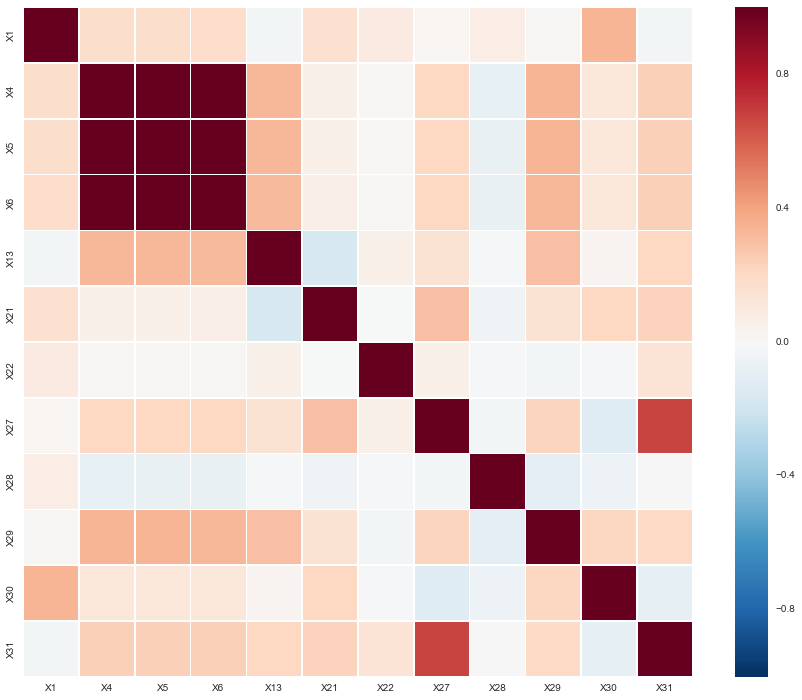

In [417]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr,linewidths=.5, ax=ax);

The columns X4, X5, X6 are all positively correlated with each other this implies we cannot use all these three or any two variables together in our models as they can lead to multicollinearity issue which is common in linear models. As we can see there are no variables which are strongly correlated with the target variable except for X30 which is slightly correlated, this gives an indication that the remaining variables can be ignored from our analysis, even though they seem not significant they can be further analyzed before being ignoring completely.


Extracting important features using multiple regression
First let us extract all the columns with dtypes numeric

In [418]:
#We will also remove the column X19 as it is not very usefull for our analysis
clndf.drop(['X19'], inplace =True , axis=1)


In [419]:
clndf.dtypes

X1         float64
X4         float64
X5         float64
X6         float64
X7        category
X9        category
X11       category
X12       category
X13        float64
X14       category
X17       category
X20       category
X21        float64
X22        float64
X24       category
X27        float64
X28        float64
X29        float64
X30        float64
X31        float64
X32       category
X15_yr    category
X15_mn    category
X23_yr    category
X23_mn    category
dtype: object

In [420]:
#first let us split our variable into categories and numericals so that we can work on them seperately
catgrydf=clndf.loc[:,clndf.dtypes.isin(['category'])]
quantdf=clndf.loc[:,clndf.columns-catgrydf.columns]
catgrydf['X1']=clndf.X1

In [421]:
# we can first do a simple groupby function to find out if the means vary by each group of categorical variable, we know they do 
#for varible X9.

#catgrydf.columns
for i in range(len(catgrydf.columns)):
    print catgrydf.groupby(catgrydf.columns[i])['X1'].mean()
#the group means are changing

X7
 36     12.736770
 60     17.225859
Name: X1, dtype: float64
X9
A1     6.001833
A2     6.564321
A3     7.446712
A4     7.829278
A5     8.703836
B1     9.730990
B2    10.772892
B3    11.698913
B4    12.474209
B5    13.069579
C1    13.680796
C2    14.282746
C3    14.838568
C4    15.415817
C5    16.044457
D1    16.699531
D2    17.295821
D3    17.836658
D4    18.406521
D5    19.072925
E1    19.565643
E2    20.222383
E3    20.814488
E4    21.505303
E5    22.139226
F1    22.921787
F2    23.363862
F3    23.904966
F4    24.233208
F5    24.541849
G1    24.930456
G2    25.094294
G3    25.324306
G4    25.179469
G5    25.466348
Name: X1, dtype: float64
X11
0      14.081536
0.5    13.670761
1      13.723704
10     14.132558
2      13.772990
3      13.755650
4      13.769164
5      13.890949
6      13.944629
7      14.074204
8      13.983819
9      14.032441
Name: X1, dtype: float64
X12
ANY         11.670000
MORTGAGE    13.709522
NONE        15.082917
OTHER       13.141776
OWN         14.048425
R

The group means are changing only for a the categorical columns X9 and X7, for the rest there are closely same. which implies only X7 and X9 are important variables.

Label encoding the variables so that it can be used for further analysis.

In [422]:
#labelEncoding('X17',catgrydf)
#catgrydf.loc[['X9','X12','X14','X17','X20','X32']].apply(lambda x:labelEncoding(x,catgrydf))


from sklearn import preprocessing
le = preprocessing.LabelEncoder()  
catgrydf['X9_enc']=pd.Series(le.fit_transform(cmpltdf.X9))
catgrydf['X12_enc']=pd.Series(le.fit_transform(cmpltdf.X12))
catgrydf['X14_enc']=pd.Series(le.fit_transform(cmpltdf.X14))
catgrydf['X17_enc']=pd.Series(le.fit_transform(cmpltdf.X17))
catgrydf['X20_enc']=pd.Series(le.fit_transform(cmpltdf.X20))
catgrydf['X32_enc']=pd.Series(le.fit_transform(cmpltdf.X32))


In [423]:
#Converting the new types into catagorey
catgrydf[['X9_enc','X12_enc','X14_enc','X17_enc','X20_enc','X32_enc']]=catgrydf[[
        'X9_enc','X12_enc','X14_enc','X17_enc','X20_enc','X32_enc']].apply(lambda x:x.astype('category'))

In [424]:
#deleting all the converted variables.
catgrydf.drop(['X9','X12','X14','X17','X20','X32'],axis=1,inplace=True)
catgrydf.drop(['X1'],axis=1,inplace=True)

In [425]:
#merging and copying into a new dataframe
newdf=pd.concat([catgrydf,quantdf],axis=1)
newdf.isnull().sum()
newdf.shape

(390539, 25)

Splitting the data into dependent and independent variables

In [426]:

train=newdf
Y_train_data=train.X1
X_train_data=train.drop(['X1'],1)
X_train_data.columns

Index([u'X7', u'X11', u'X24', u'X15_yr', u'X15_mn', u'X23_yr', u'X23_mn',
       u'X9_enc', u'X12_enc', u'X14_enc', u'X17_enc', u'X20_enc', u'X32_enc',
       u'X13', u'X21', u'X22', u'X27', u'X28', u'X29', u'X30', u'X31', u'X4',
       u'X5', u'X6'],
      dtype='object')

In [427]:
#train test split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
scaler=preprocessing.StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X_train_data, Y_train_data, test_size=0.3)
#scaler.fit_transform(X_train_data)

In [428]:
#scaler.fit(X_train_data)
X_train_data.head()

,X7,X11,X24,X15_yr,X15_mn,X23_yr,X23_mn,X9_enc,X12_enc,X14_enc,...,X21,X22,X27,X28,X29,X30,X31,X4,X5,X6
0,36,0.5,0,2016,8,1994,2,9,6,1,...,19.48,0,10,0,28854,52.1,42,25000,25000,19080
1,36,0.5,0,2016,5,2000,10,10,6,2,...,14.29,0,7,0,33623,76.7,7,7000,7000,673
2,36,1,0,2016,8,2000,6,18,6,1,...,10.50,0,10,0,19878,66.3,17,25000,25000,24725
3,36,10,0,2016,3,1985,1,12,5,2,...,5.47,0,5,0,2584,40.4,31,1200,1200,1200
4,36,6,1,2016,11,1996,12,13,6,2,...,11.63,0,14,0,3511,25.6,40,10800,10800,10692


The above inferences made about the important features can be tested with various statistical tests and other methods. First thing that
can be done is compute a simple Pearson correlations amongst all the variable and get the most important variables, The f_regression function from
the preprocessing package in sklearn can be very efficient in computing the p-values but first we need to get the data ready for analysis.

In [429]:

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
scaler=preprocessing.StandardScaler()
featureSelector = SelectKBest(score_func=f_regression,k=5)
featureSelector.fit(scaler.fit_transform(X_train_data),scaler.fit_transform(Y_train_data))
X_train_data.loc[:,featureSelector.get_support()].columns, featureSelector.get_support()

(Index([u'X7', u'X24', u'X9_enc', u'X14_enc', u'X30'], dtype='object'),
 array([ True, False,  True, False, False, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False], dtype=bool))

The results of a simple correlation test has given the five most important variables as specified in the code, 
of this five using only the two most important variables to build a base model, If using more than two variables multicollinearity issue creeps into the model


# MODEL BUILDING:

Using statsmodels package in python to build the base model as it provides various statistics which can be interactive in feature selection.

In [474]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
all_columns = "+".join(X_train[[ 'X7','X9_enc']])
my_formula = "Y_train~" + all_columns
lm=smf.ols(formula=my_formula, data=X_train).fit()
#lm = smf.ols(np.array(Y_train_data),np.array())


In [475]:
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                Y_train   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 2.141e+05
Date:                Tue, 05 Jul 2016   Prob (F-statistic):               0.00
Time:                        11:39:04   Log-Likelihood:            -3.3395e+05
No. Observations:              273377   AIC:                         6.680e+05
Df Residuals:                  273341   BIC:                         6.683e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept        6.0000      0.010    572.737   

In [442]:
lm.predict(X_test[[ 'X7','X9_enc']])


array([  8.7133385 ,   8.7133385 ,  19.63401416, ...,  16.10268529,
         9.73513969,  12.37729437])

The summary shows that the R-squared value and adjusted R-squared values are high suggesting goodness of the fit. Also there is no trace of multicollinearity issue as none of the coefficients are small or negligible and also the summary suggest that all the tests are passed without any warnings. Now assessing the
error on the train data.


In [476]:
#lm.predict(X_train[[u'X7', u'X9_enc', u'X14_enc', u'X24']])
np.sqrt(lm.mse_resid)

0.82094297938615446

The train error is 0.821 on train data similary error can also be caluculated on the test data. Writing a simple function called 
metric which will compute the error metric on test

In [299]:
def metric(dfXtest,dfYtest,clf,standardize=False):
    if standardize:
        from sklearn.preprocessing import StandardScaler
        scaler=preprocessing.StandardScaler()
        dfXtest=scaler.fit_transform(dfXtest)
    else:
        dfXtest
    from sklearn.metrics import mean_squared_error
    predicted=clf.predict(dfXtest)
    return np.sqrt(mean_squared_error(dfYtest,predicted)),predicted,dfYtest

In [477]:
testerror,predictedvals,actual=metric(X_test[[ 'X7','X9_enc']],Y_test,lm)
testerror

0.82300565247332569

The error on the test is 0.815, the basic linear classifier has slightly missed in accuracy but it has done fairly well being the simplest model. A more regularized model might be a good fit because if one notices the magnitude of the coefficients of our simple model they are huge which might be the reason for the error not being accurate and the magnitude of coefficients can be reduced by adding penalty which the regularization models like ridge and lasso can take care of. We shall see if fitting a regularized model can solve the problem of accuracy as well.

In order to implement regularized model scikit learn is more suitable as it allows doing cross validation to find the best parameters
the below function CV is a simple implementation of sklearn GridSearchCV module which finds the best parameters after going over each fold.


In [456]:
def cv(clf, parameters, Xdf, ydf,n_folds=5):
    from sklearn.grid_search import GridSearchCV
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X_train, Y_train)
    print "BEST PARAMS ARE", gs.best_params_
    #print "Best Score", gs.grid_scores_
    best = gs.best_estimator_
    #cv_score=gs.grid_scores_
    return best


The below function regression is the main function which uses the earlier described function metric and cv to fit the best parameters
found in cv over the whole training data and give the error metric on train.

In [276]:
def regression(clf, parameters, X, Y,n_folds=5,train_size=0.7,features=False,standardize=False,*args):
    if features:
        subdf=X[args]
    else:
        subdf=X
    if standardize:
        from sklearn.preprocessing import StandardScaler
        scaler=preprocessing.StandardScaler()
        subdfstd=scaler.fit_transform(subdf)
    else:
        subdfstd=subdf
    Xtr=subdfstd
    Ytr=Y
    X_train, X_test, Y_train, Y_test = train_test_split(Xtr, Ytr, train_size=train_size)
    clf = cv(clf, parameters, X_train, Y_train,n_folds=5)
    clf=clf.fit(X_train, Y_train)
    trainRMSE,xjunk,yjunk = metric(X_train, Y_train,clf,standardize=False)
    print "Rmse on Train: %0.5f" % (trainRMSE)
    return clf, X_train, Y_train, X_test, Y_test,trainRMSE

The below function dum, creates dummies(one hot encoding) suitable for sklearn implementations

In [279]:
def dum(df):
    dum=pd.get_dummies(df)
    return dum.iloc[:,1:]

In [443]:

#preparing data for regularization 
X=pd.concat([dum(X_train_data['X7']),dum(X_train_data['X9_enc'])],axis=1)

Importing the ridge regression module and tuning parameters using the regression function. The ridge regression applies L1 penalty on the coefficients with large magnitudes. The best parameter of alpha(L1) is 100, 
on evaluating the error on test data we can see the accuracy has increase when compared to the benchmark model.


In [380]:
from sklearn.linear_model import Ridge
clfRIDGE=Ridge()
#clfRIDGE.get_params()

In [478]:
RDGmdl,xtRdg,ytRdg,xteRdg,yteRdg,trainerrorRdg=regression(clfRIDGE,{'alpha':[0.1,1,10,100,200]},X,Y_train_data,n_folds=5,
                                                          train_size=0.7,
                             standardize=True)

BEST PARAMS ARE {'alpha': 100}
Rmse on Train: 0.82085


In [462]:
testerrorRdg,predictedvalsRdG,actualRdg=metric(xteRdg,yteRdg,RDGmdl)
testerrorRdg

0.82701673013874522

In [446]:
RDGmdl.score(xtRdg,ytRdg)

0.96486867514213959

The R-squared value of the model is 0.96, so we can conclude that the Ridge model has the same error rate as the linear model. Moving on to tree based models, as tree based models like random forests and XGboosts work well when the dependent variables are categorical.

Building a random forest classifier, even though random forest is based on bagging technique, it is highly recommended to cross validate. Setting up the appropriate parameters and parsing the classifier to the regression function defined above.

In [457]:
from sklearn.ensemble import RandomForestRegressor
clfRF=RandomForestRegressor()
clfRF.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [458]:
RFmdl,xtRF,ytRF,xteRF,yteRF,trainerrorRF=regression(clfRF,{'n_estimators':[200,300],'max_features': ['sqrt'],'n_jobs':[3],
                                                           'random_state': [10]}
                                        ,X,Y_train_data,n_folds=5,train_size=0.7,
                                                    standardize=False)

BEST PARAMS ARE {'max_features': 'sqrt', 'n_estimators': 300, 'n_jobs': 3, 'random_state': 10}
Rmse on Train: 0.81846


In [459]:
testerrorRF,predictedvalsRF,actualRF=metric(xteRF,yteRF,RFmdl)
testerrorRF

0.81935346148604105

In [460]:
RFmdl.score(xtRF,ytRF)

0.96494142755709289

As we can see the error rate has decreased significantly with the forests as expected and also the score suggests the model is a good fit 
the Random forests worked better than generalization methods because the most important variables are all categories


Cleaning the test data so that the trained classifiers can be used to predict the values on holdout data.

In [311]:
test=pd.read_csv('C:/Users/Raj/Desktop/sf work assignment.6.8.2016 (1)/Holdout for Testing.csv')

In [312]:
def test_clean(df):
    #df['X1']=df['X1'].str.strip('%')
    df[['X4','X5','X6']]=df[['X4','X5','X6']].apply(lambda x:x.str.strip('$').replace(',','',regex=True))
    df.X7=df.X7.str.rstrip('months')
    #assigning <1 as 0.5 and 10+ years as 10,converting n/a to 0 for column X11
    df.X11=df.X11.str.rstrip('+ years').replace('< 1','0.5',regex=True)
    df.X11=df.X11.str.replace('n/','0')
    df.X14=df.X14.str.rstrip('- income source')
    #converting the date column into datetime.
    df.X15=pd.to_datetime(df.X15,format='%m/%d/%Y')
    df['X23']=pd.to_datetime(df.X23,format='%m/%d/%Y')
    df.X30=df.X30.str.strip('%')
    df['X15_yr']=df.X15.dt.year
    df['X15_mn']=df.X15.dt.month
    df['X23_yr']=df.X23.dt.year
    df['X23_mn']=df.X23.dt.month
    #changing dtypes
    df[['X4','X5','X6','X13','X21','X22','X25','X26','X27',
         'X28','X29','X30','X31']]=df[['X4','X5','X6','X13',
                                            'X21','X22','X25','X26','X27','X28','X29','X30','X31']].apply(lambda x:pd.to_numeric(x))

    df[['X7','X8','X9','X11','X12','X14','X17','X20','X32','X15_yr','X15_mn','X23_yr','X23_mn','X24']]=df[[
        'X7','X8','X9','X11','X12','X14','X17','X20','X32','X15_yr','X15_mn','X23_yr','X23_mn','X24']].apply(lambda x:x.astype('category'))
    return df

In [313]:
test=test_clean(test)

In [467]:
#prepating test data
Xte=pd.concat([dum(test['X7']),dum(test['X9'])],axis=1)

Predicting with ridge classifier

In [481]:
RDGpredictions=RDGmdl.predict(Xte)
RDGpredictions=pd.Series(RDGpredictions)
RDGpredictions.describe()

count    80000.000000
mean        15.416918
std          0.636854
min         13.944138
25%         15.037385
50%         15.651920
75%         15.946009
max         16.073439
dtype: float64

Predicting with Random Forest classifier.

In [480]:
RFpredictions=RFmdl.predict(Xte)
RFpredictions=pd.Series(rftemp)
RFpredictions.describe()

count    80000.000000
mean        13.945600
std          4.270745
min          6.003808
25%         10.784590
50%         13.711056
75%         16.777297
max         25.650080
dtype: float64

In [482]:
out=pd.concat([RDGpredictions,RFpredictions],axis=1)
out.to_csv('out.csv')